<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

<Ответ>

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<Ответ>

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

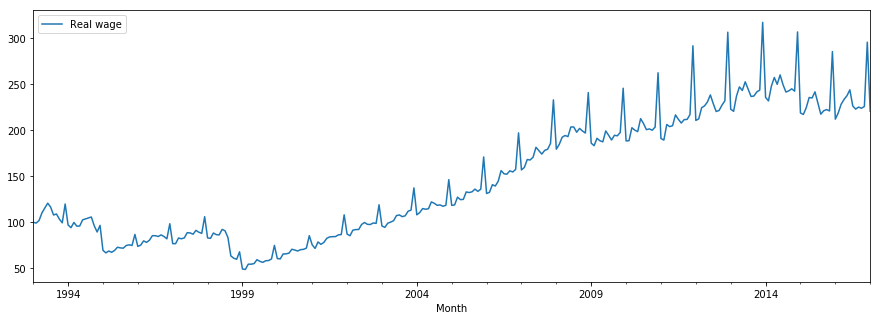

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('/Developer/ml-mipt/ml-mipt-part2/2017/seminars/1_ts_esm/data/monthly-wage.csv', sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)                                                                                                   

# Put your code below
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

In [2]:
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

## 1) Search for the optimal $\alpha$ 

In [69]:
ALPHA = np.linspace(0.01, 1, 100)
ESParamsArray = [{'alpha': alpha,
                  'AdaptationPeriod': 10
                 } for alpha in ALPHA
                ]
FRC_WAGE = BuildForecast(h=1,
                         ts=wage.loc['1998-09':'2015-01'],
                         AlgName='InitExponentialSmoothing',
                         AlgTitle='InitExponentialSmoothing',
                         ParamsArray = ESParamsArray,
                         step="MS"
                        )

In [70]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09':'2015-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

InitExponentialSmoothing {'alpha': 0.34000000000000002, 'AdaptationPeriod': 10}     0.055873
InitExponentialSmoothing {'alpha': 0.35000000000000003, 'AdaptationPeriod': 10}     0.055887
InitExponentialSmoothing {'alpha': 0.33000000000000002, 'AdaptationPeriod': 10}     0.055906
InitExponentialSmoothing {'alpha': 0.36000000000000004, 'AdaptationPeriod': 10}     0.055912
InitExponentialSmoothing {'alpha': 0.37, 'AdaptationPeriod': 10}                    0.055954
InitExponentialSmoothing {'alpha': 0.32000000000000001, 'AdaptationPeriod': 10}     0.055955
InitExponentialSmoothing {'alpha': 0.38, 'AdaptationPeriod': 10}                    0.056013
InitExponentialSmoothing {'alpha': 0.31, 'AdaptationPeriod': 10}                    0.056026
InitExponentialSmoothing {'alpha': 0.39000000000000001, 'AdaptationPeriod': 10}     0.056077
InitExponentialSmoothing {'alpha': 0.29999999999999999, 'AdaptationPeriod': 10}     0.056128
InitExponentialSmoothing {'alpha': 0.40000000000000002, 'AdaptationPer

## 2) draw the forecast with optimial value $\alpha $

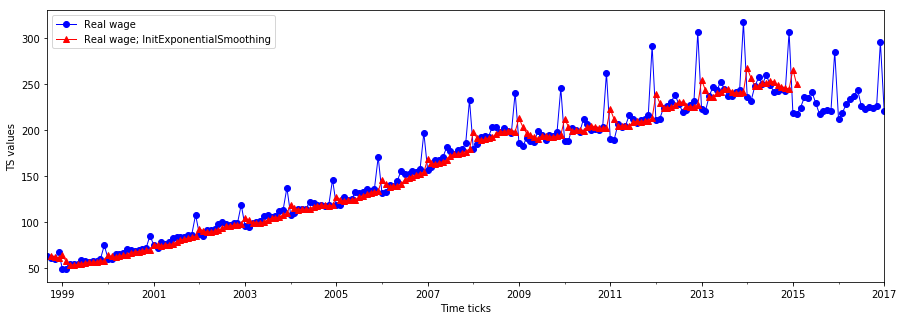

In [73]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09':'2017-01'], FRC_WAGE[algName].loc['1998-09':'2017-01']
               , ts_num=0, alg_title='InitExponentialSmoothing')

** Question**
    * Does SES follow to the TS components?

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [74]:
qualityMACAPE(wage.loc['2015-02':'2017-01'], FRC_WAGE[algName].loc['2015-02':'2017-01'])[0]

Real wage    0.140157
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [ ]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = ## put foreast of the model here
    
    l= # initialize ts level 
    s= # initalize seasonality values (it must be vector of lenth p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= # initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= # initialize 
 
            l = # recurrent smoothing of level 
            s[cntr % p] = # recurrent smoothing of seasonality
            
        FORECAST[cntr+h] = a + b[cntr+h % s]
    return FORECAST

In [ ]:
# Put your code here


# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [3]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [ ]:
# Put your code here